In [591]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [592]:
# Read the sales data

df_product = pd.read_csv("./Resources/PROD_final.csv")
df_sales = pd.read_csv("./Resources/SALES_final2.csv")

# Display sample data
df_product.head()

,Part_No,Description,Category,Vendor No,Available,On Hand,Current Cost,Volume (inch^3),Length (UDF),Width (UDF),Height (UDF),Weight (UDF),Product Code,Pallet Quantity (Incoming Max) (UDF),Pallet Length (inches) (UDF),Pallet Width (inches) (UDF)
0,111MedPol009R,Med. Pile Polycarbonate 9Mat 40x40,Polycarbonate Chair Mat,MANU123,0,0,39.59700,840.5,41.0,41.0,0.5,6.0,MATS,100,62,50
1,111MedPol9RBL,Med.Pile Poly 9Mat 40x40 Blue,Polycarbonate Chair Mat,MANU123,13,13,36.68120,840.5,41.0,41.0,0.5,6.0,MATS,100,62,50
2,111MedPol09RC,Med.Pile Poly 9Mat 40x40 Cerise,Polycarbonate Chair Mat,MANU123,0,0,38.62101,840.5,41.0,41.0,0.5,6.0,MATS,100,62,50
3,111MedPol23LR,Med. Pile Polycarbonate 48x53 w/lip,Polycarbonate Chair Mat,MANU123,3,3,51.41580,1347.5,47.0,12.0,12.0,11.0,MATS,100,62,48
4,111AllPol23ER,All Carpet Polycarbonate 60'x60',Polycarbonate Chair Mat,MANU123,2,2,88.64100,14400.0,60.0,14.0,14.0,17.0,MATS,15,62,50


In [593]:
df_sales = df_sales[df_sales['Invoice Date'].notna()]

In [594]:

df_sales.head()

,Unit Price,Invoice Date,Order Qty,Ship Qty,B/O,Extended price,U/M,Margin % (Current),Currency,Product Code,Part_No,PO No,Customer No,Invoice No
0,33.95,43102.0,1,1,0,33.95,EA,38,NaN,MATS,123HarPVC20LV,CA100436839,WAYFAR,301833
1,101.90,43104.0,1,1,0,101.90,EA,58,NaN,MATS,FPRPreEnt72CH,64242622,STAPLESDS,302672
2,50.20,43109.0,2,2,0,100.40,EA,58,NaN,MATS,FCOCoAnt36BK,64286923,STAPLESDS,302946
3,130.00,43111.0,2,2,0,260.00,EA,45,NaN,MATS,111AllPol23ER,177671,G&THOO,302517
4,84.70,43111.0,4,4,0,338.80,EA,41,NaN,MATS,111MedPol23ER,64322719,STAPLES,302514


In [595]:
df_sales.shape

(67288, 14)

In [596]:
df_sales['Invoice Date']=df_sales['Invoice Date'].astype(int)
df_sales['Invoice Date'].dtype

dtype('int32')

In [597]:
df_sales['Invoice Date']=df_sales['Invoice Date'].astype(int)

for i in range(0, len(df_sales['Invoice Date'])):
   df_sales['Invoice Date'][i] = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + df_sales['Invoice Date'][i] - 2)

C:\Users\v_don\AppData\Local\Temp\ipykernel_6932\77963408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['Invoice Date'][i] = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + df_sales['Invoice Date'][i] - 2)


In [598]:
df_sales.head()

,Unit Price,Invoice Date,Order Qty,Ship Qty,B/O,Extended price,U/M,Margin % (Current),Currency,Product Code,Part_No,PO No,Customer No,Invoice No
0,33.95,2018-01-02 00:00:00,1,1,0,33.95,EA,38,NaN,MATS,123HarPVC20LV,CA100436839,WAYFAR,301833
1,101.90,2018-01-04 00:00:00,1,1,0,101.90,EA,58,NaN,MATS,FPRPreEnt72CH,64242622,STAPLESDS,302672
2,50.20,2018-01-09 00:00:00,2,2,0,100.40,EA,58,NaN,MATS,FCOCoAnt36BK,64286923,STAPLESDS,302946
3,130.00,2018-01-11 00:00:00,2,2,0,260.00,EA,45,NaN,MATS,111AllPol23ER,177671,G&THOO,302517
4,84.70,2018-01-11 00:00:00,4,4,0,338.80,EA,41,NaN,MATS,111MedPol23ER,64322719,STAPLES,302514


In [599]:
df_sales['Part_No'].value_counts()

121HarPVC20EV     8457
129HarPVC20LV     6949
119LowPVC25LV     4994
123HarPVC20LV     3176
FCVLaSte836A      2190
                  ... 
129HarPol19SR        2
1218HarPol19ER       1
FBDDesDes36RA        1
FPDAnDes84RA         1
FPDAnDes924V         1
Name: Part_No, Length: 157, dtype: int64

In [600]:
sales=df_sales[['Invoice Date', 'Ship Qty', 'Part_No']]
sales.head()

,Invoice Date,Ship Qty,Part_No
0,2018-01-02 00:00:00,1,123HarPVC20LV
1,2018-01-04 00:00:00,1,FPRPreEnt72CH
2,2018-01-09 00:00:00,2,FCOCoAnt36BK
3,2018-01-11 00:00:00,2,111AllPol23ER
4,2018-01-11 00:00:00,4,111MedPol23ER


In [601]:
sales.dtypes

Invoice Date    object
Ship Qty         int64
Part_No         object
dtype: object

In [602]:
products=df_product[['Category', 'Part_No']]
products.head()

,Category,Part_No
0,Polycarbonate Chair Mat,111MedPol009R
1,Polycarbonate Chair Mat,111MedPol9RBL
2,Polycarbonate Chair Mat,111MedPol09RC
3,Polycarbonate Chair Mat,111MedPol23LR
4,Polycarbonate Chair Mat,111AllPol23ER


In [603]:
sales=pd.merge(sales, products)
sales.head()

,Invoice Date,Ship Qty,Part_No,Category
0,2018-01-02 00:00:00,1,123HarPVC20LV,PVC Chair Mat
1,2018-01-19 00:00:00,1,123HarPVC20LV,PVC Chair Mat
2,2018-01-19 00:00:00,1,123HarPVC20LV,PVC Chair Mat
3,2018-01-22 00:00:00,1,123HarPVC20LV,PVC Chair Mat
4,2018-01-22 00:00:00,1,123HarPVC20LV,PVC Chair Mat


In [604]:
sales['Invoice Date']=pd.to_datetime(sales_df['Invoice Date'])
sales.dtypes

Invoice Date    datetime64[ns]
Ship Qty                 int64
Part_No                 object
Category                object
dtype: object

In [605]:
#import datetime as dt
sales['year'] = sales['Invoice Date'].dt.year
sales['month'] = sales['Invoice Date'].dt.month
sales['day'] = sales['Invoice Date'].dt.day
sales.head()

,Invoice Date,Ship Qty,Part_No,Category,year,month,day
0,2018-01-02,1,123HarPVC20LV,PVC Chair Mat,2018,1,2
1,2018-01-19,1,123HarPVC20LV,PVC Chair Mat,2018,1,19
2,2018-01-19,1,123HarPVC20LV,PVC Chair Mat,2018,1,19
3,2018-01-22,1,123HarPVC20LV,PVC Chair Mat,2018,1,22
4,2018-01-22,1,123HarPVC20LV,PVC Chair Mat,2018,1,22


In [606]:
sales.dtypes

Invoice Date    datetime64[ns]
Ship Qty                 int64
Part_No                 object
Category                object
year                     int64
month                    int64
day                      int64
dtype: object

In [607]:
sales.shape

(64218, 7)

In [608]:
sales.rename(columns = {'Ship Qty':'Ship Quantity'}, inplace = True)
sales['Category'].value_counts()

PVC Chair Mat                31150
Polycarbonate Chair Mat       8987
Recycled Chair Mat            5544
Anti-Fatigue Mat              5228
Desk Pad                      4267
Steel Whiteboard              4178
Porcelain Whiteboard          2248
Entrance Mat                  1412
Tempered Glass Chair Mat       678
Tempered Glass Whiteboard      526
Name: Category, dtype: int64

C:\Users\v_don\AppData\Local\Temp\ipykernel_6932\1436410977.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales.groupby(['Category']).sum().plot(kind='pie', y='Ship Quantity', autopct='%1.0f%%', legend=False, fontsize=8)


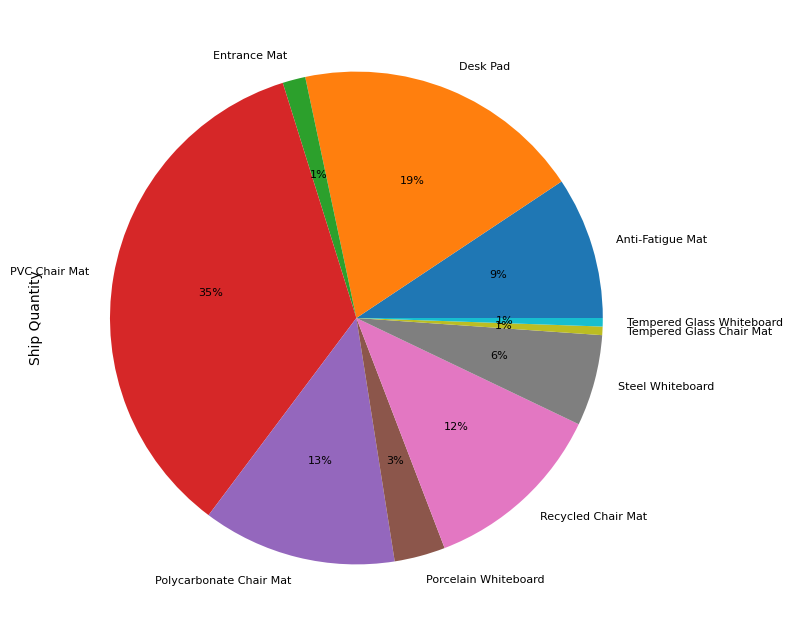

In [609]:
sales.groupby(['Category']).sum().plot(kind='pie', y='Ship Quantity', autopct='%1.0f%%', legend=False, fontsize=8)
plt.show()

In [610]:
product_1=sales.loc[(sales['Category']=='Anti-Fatigue Mat')]

product_1.head()


,Invoice Date,Ship Quantity,Part_No,Category,year,month,day
3263,2018-01-09,2,FCOCoAnt36BK,Anti-Fatigue Mat,2018,1,9
3264,2018-01-12,2,FCOCoAnt36BK,Anti-Fatigue Mat,2018,1,12
3265,2018-01-17,1,FCOCoAnt36BK,Anti-Fatigue Mat,2018,1,17
3266,2018-01-17,2,FCOCoAnt36BK,Anti-Fatigue Mat,2018,1,17
3267,2018-01-17,2,FCOCoAnt36BK,Anti-Fatigue Mat,2018,1,17


In [611]:
product_1=product_1[['year', 'month', 'Ship Quantity']]
product_1.head()

,year,month,Ship Quantity
3263,2018,1,2
3264,2018,1,2
3265,2018,1,1
3266,2018,1,2
3267,2018,1,2


In [612]:
product_1=product_1.groupby(['year', 'month']).sum()
#product_1.tail()
product_1['3 Moving Averages'] = product_1['Ship Quantity'].rolling(window=3).mean()
product_1.head()

Ship Quantity  3 Moving Averages
year month                                  
2018 1                149                NaN
     2                315                NaN
     3                293         252.333333
     4                185         264.333333
     5                234         237.333333

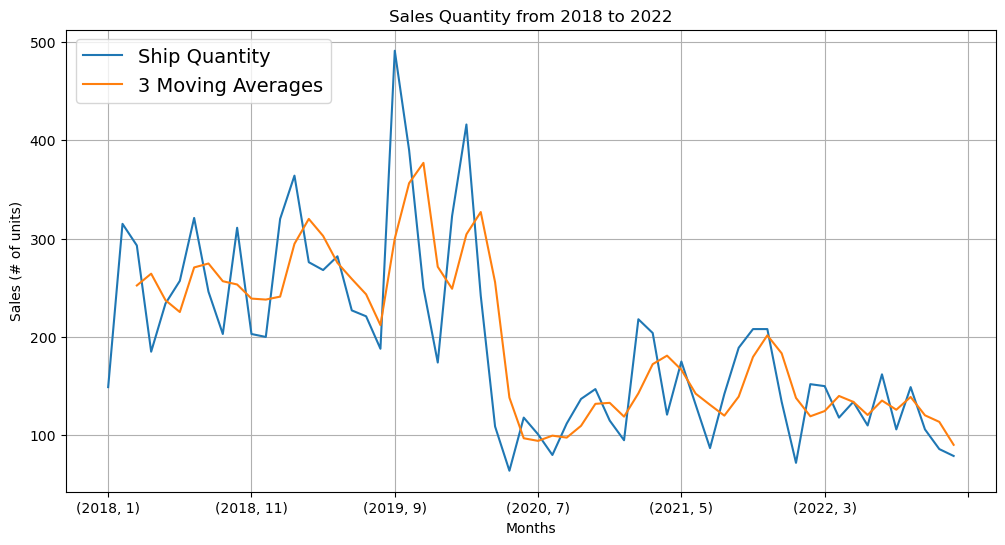

In [613]:
#fig, axs = plt.subplots()
prod_1 = product_1.plot(figsize=(12, 6), grid=True)
prod_1.set(title = 'Sales Quantity from 2018 to 2022', xlabel = 'Months', ylabel = 'Sales (# of units)')
#plt.line(prod_1['3 Mov Avg'], label = 'Moving averages 3 month period', color = 'orange')
plt.legend(title = '', loc = 'upper left', fontsize = 14)
plt.show()

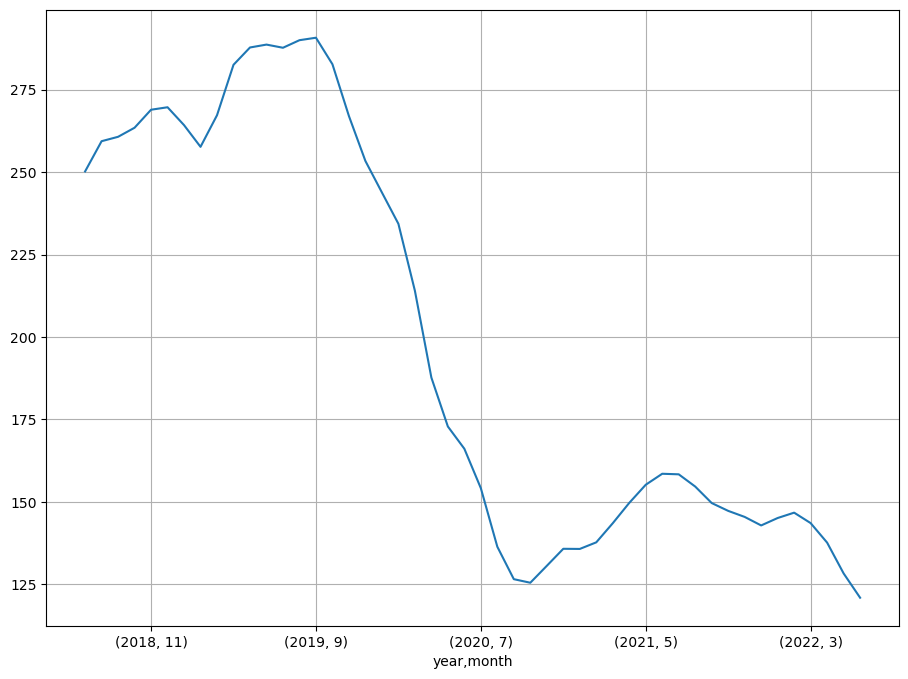

In [614]:
# import of the function seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
 
result=seasonal_decompose(product_1['Ship Quantity'], model='multiplicable', period=12)

result.trend.plot(grid=True)
plt.show()

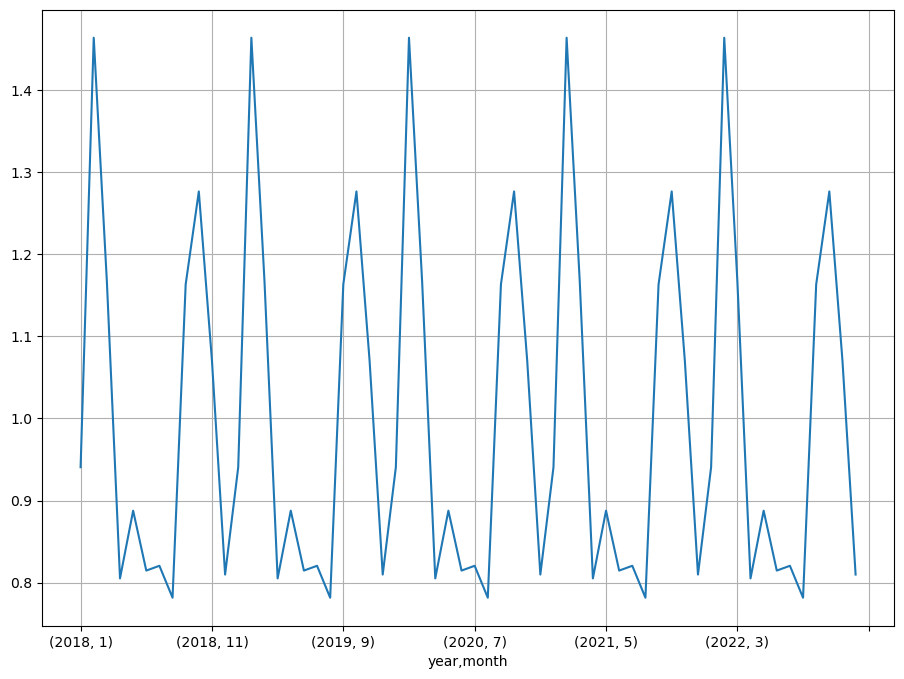

In [615]:
result.seasonal.plot(grid=True)
plt.show()

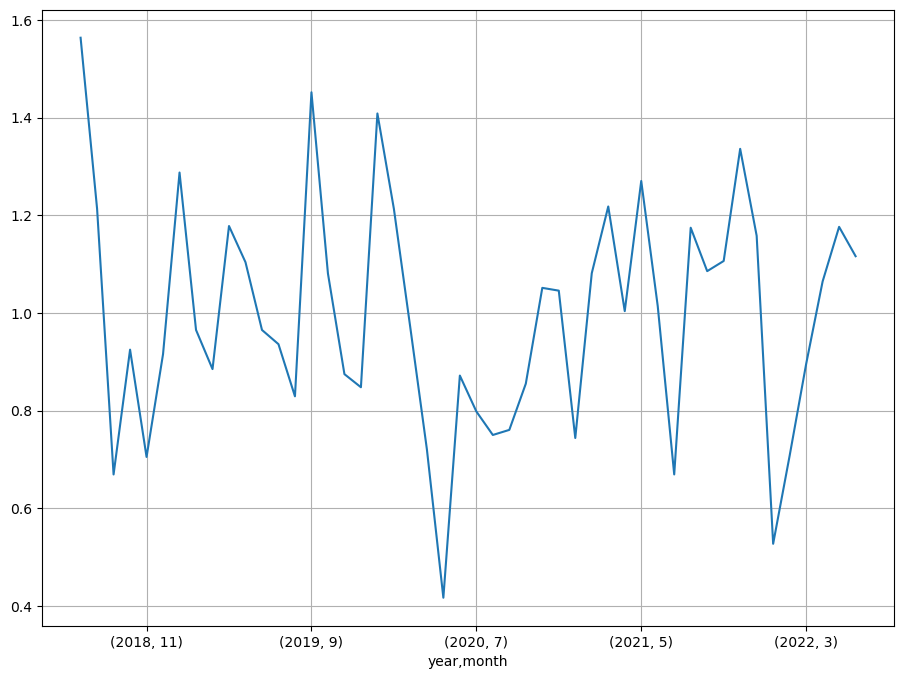

In [616]:
result.resid.plot(grid=True)
plt.show()

Dickey-Fuller test:
H_0: The time series are not stationary (p_value >= 0.05)
H_1: Reject H_0 (p_value < 0.05)

In [617]:
# import files for Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
 
# adf_test
adf_test = adfuller(product_1['Ship Quantity'])
 
# p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.625604753763636
